# Data Cleaning

## Introduction

This notebook goes through a necessary step of any data science project - data cleaning. Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

1. **Getting the data - **in this case, we'll be scraping data from a website
2. **Cleaning the data - **we will walk through popular text pre-processing techniques
3. **Organizing the data - **we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this notebook will be clean, organized data in two standard text formats:

1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

In [0]:
import pandas as pd

df=pd.read_csv('Emotion Phrases.csv')
df.head()

,Emotions,Phrases
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [0]:
anger=[' ']
disgust=[' ']
fear=[' ']
guilt=[' ']
joy=[' ']
sadness=[' ']
shame=[' ']
surprise=[' ']
for i in range(df.shape[0]):
  if df['Emotions'][i]=='anger':
    anger[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='disgust':
    disgust[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='fear':
    fear[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='guilt':
    guilt[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='joy':
    joy[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='sadness':
    sadness[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='shame':
    shame[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='surprise':
    surprise[0]+=df['Phrases'][i]+' '
data_combined={'anger':anger, 'disgust':disgust, 'fear':fear, 'guilt':guilt, 'joy':joy, 'sadness':sadness, 'shame':shame, 'surprise':surprise}

In [0]:
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
anger,When I had been obviously unjustly treated an...
disgust,At a gathering I found myself involuntarily s...
fear,Every time I imagine that someone I love or I...
guilt,I feel guilty when when I realize that I cons...
joy,On days when I feel close to my partner and o...
sadness,When I think about the short time that we liv...
shame,When I realized that I was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
data_df.transcript.loc['anger']

' When I had been obviously unjustly treated and had no possibility á\nof elucidating this. When a car is overtaking another and I am forced to drive off the á\nroad. When one is unjustly accused of something one has not done. Friends who torture animals. When my partner was attacked and lost three teeth. Unjust accusations directed at me and my way of acting, by á\nsomeone close to me.   When I heard on the radio that the football match in Belgium had á\nended in a catastrophe, and several people had died.  I could not á\n understand how normal people could behave in such a way. At my Summer job, nobody looked after me in particular and I had á\nto learn all on my own. When I spoke to Jan-Erik Wikstr÷m on the telephone.  I locked myself out. At work, when an elderly man complained unjustifiably about me and á\ndistrusted me. Mad at my dad. When someone stole my bike. When friends try to put me down or hurt me.   When my boyfriend went away for a month long holiday without me. At a res

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
anger,when i had been obviously unjustly treated an...
disgust,at a gathering i found myself involuntarily s...
fear,every time i imagine that someone i love or i...
guilt,i feel guilty when when i realize that i cons...
joy,on days when i feel close to my partner and o...
sadness,when i think about the short time that we liv...
shame,when i realized that i was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('á','',text)
    return text

round2 = lambda x: clean_text_round2(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
anger,when i had been obviously unjustly treated an...
disgust,at a gathering i found myself involuntarily s...
fear,every time i imagine that someone i love or i...
guilt,i feel guilty when when i realize that i cons...
joy,on days when i feel close to my partner and o...
sadness,when i think about the short time that we liv...
shame,when i realized that i was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
data_clean.transcript.loc['anger']

' when i had been obviously unjustly treated and had no possibility of elucidating this when a car is overtaking another and i am forced to drive off the road when one is unjustly accused of something one has not done friends who torture animals when my partner was attacked and lost three teeth unjust accusations directed at me and my way of acting by someone close to me   when i heard on the radio that the football match in belgium had ended in a catastrophe and several people had died  i could not  understand how normal people could behave in such a way at my summer job nobody looked after me in particular and i had to learn all on my own when i spoke to janerik wikstr÷m on the telephone  i locked myself out at work when an elderly man complained unjustifiably about me and distrusted me mad at my dad when someone stole my bike when friends try to put me down or hurt me   when my boyfriend went away for a month long holiday without me at a restaurant i observed how the gypsies tried t

**NOTE:** This data cleaning aka text pre-processing step could go on for a while, but we are going to stop for now. After going through some analysis techniques, if you see that the results don't make sense or could be improved, you can come back and make more edits such as:
* Mark 'cheering' and 'cheer' as the same word (stemming / lemmatization)
* Combine 'thank you' into one term (bi-grams)
* And a lot more...

## Organizing The Data

I mentioned earlier that the output of this notebook will be clean, organized data in two standard text formats:
1. **Corpus - **a collection of text
2. **Document-Term Matrix - **word counts in matrix format

### Corpus

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [0]:
emotion=['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame', 'surprise']

data_clean['emotion']=emotion
data_clean

,transcript,emotion
anger,when i had been obviously unjustly treated an...,anger
disgust,at a gathering i found myself involuntarily s...,disgust
fear,every time i imagine that someone i love or i...,fear
guilt,i feel guilty when when i realize that i cons...,guilt
joy,on days when i feel close to my partner and o...,joy
sadness,when i think about the short time that we liv...,sadness
shame,when i realized that i was directing the feel...,shame
surprise,admir admiration amaz amaze amazed amazement ...,surprise


### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [0]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,abandoned,abdomen,abdominal,abhor,abhorr,abhorred,abhorrence,abhorrent,abilities,ability,able,abnormal,abomin,abominable,abominably,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abroad,abrupt,abruptely,abruptly,absailing,abscence,absence,absent,absentminded,absentmindedness,absolutely,absurd,abuse,abused,abusing,abusive,abut,academic,...,yielding,york,young,younger,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zigzagging,zip,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,0,0,1,1,0,1,0,2,4,8,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,2,3,1,1,1,0,...,1,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
disgust,1,1,0,0,0,1,1,0,2,0,3,4,0,1,1,1,0,0,1,2,1,1,1,0,0,0,0,0,2,0,0,0,1,0,1,2,3,0,0,1,...,0,0,21,5,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,3,...,0,1,13,4,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,...,0,0,15,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
joy,0,0,1,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,...,0,0,3,1,1,1,0,0,0,1,0,1,5,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
sadness,0,0,0,1,0,0,0,0,0,1,1,12,0,0,0,0,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,...,0,2,10,8,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,1,0,0,1,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,1,3,0,0,0,0,1,0,1,...,0,0,15,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [0]:
data=data_dtm.transpose()
data.head()

,anger,disgust,fear,guilt,joy,sadness,shame,surprise
aa,0,1,0,0,0,0,1,0
abandoned,1,1,1,0,0,0,0,0
abdomen,0,0,0,0,1,0,0,0
abdominal,0,0,0,0,0,1,1,0
abhor,1,0,0,0,0,0,0,0


In [0]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# top_dict

In [0]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

anger
angry, friend, did, told, time, got, felt, friends, people, person, mother, day, didnt, brother
---
disgust
disgusted, saw, felt, people, friend, man, disgust, did, friends, person, drunk, like, time, got
---
fear
night, afraid, car, fear, home, felt, time, did, house, friend, going, went, dark, day
---
guilt
felt, guilty, friend, did, mother, time, told, friends, went, home, parents, day, got, didnt
---
joy
friend, got, time, passed, felt, happy, joy, school, good, university, year, friends, exam, came
---
sadness
died, sad, friend, felt, time, away, father, death, years, close, mother, friends, home, did
---
shame
ashamed, felt, friend, time, did, told, friends, people, mother, day, shame, class, person, asked
---
surprise
awe, stupid, stun, wonderful, bewild, wonderfully, stunned, wonderment, wondrous, wondrously, stupefact, stupefaction, stupefi, stupefied
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [0]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
# words

In [0]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('friend', 7),
 ('time', 7),
 ('got', 7),
 ('felt', 7),
 ('friends', 7),
 ('day', 7),
 ('school', 7),
 ('did', 6),
 ('told', 6),
 ('went', 6),
 ('home', 6),
 ('came', 5),
 ('people', 4),
 ('person', 4),
 ('mother', 4),
 ('didnt', 4),
 ('father', 4),
 ('boyfriend', 4),
 ('having', 4),
 ('girl', 4),
 ('asked', 3),
 ('car', 3),
 ('saw', 3),
 ('feel', 3),
 ('thought', 3),
 ('brother', 2),
 ('wanted', 2),
 ('work', 2),
 ('said', 2),
 ('sister', 2),
 ('man', 2),
 ('know', 2),
 ('parents', 2),
 ('later', 2),
 ('passed', 2),
 ('heard', 2),
 ('years', 2),
 ('girlfriend', 2),
 ('angry', 1),
 ('anger', 1),
 ('things', 1),
 ('just', 1),
 ('disgusted', 1),
 ('disgust', 1),
 ('drunk', 1),
 ('like', 1),
 ('bus', 1),
 ('way', 1),
 ('woman', 1),
 ('tried', 1),
 ('started', 1),
 ('film', 1),
 ('night', 1),
 ('afraid', 1),
 ('fear', 1),
 ('house', 1),
 ('going', 1),
 ('dark', 1),
 ('walking', 1),
 ('scared', 1),
 ('suddenly', 1),
 ('road', 1),
 ('accident', 1),
 ('frightened', 1),
 ('guilty', 1),
 ('gui

In [0]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['friend', 'time', 'got', 'felt', 'friends', 'day', 'school']

In [0]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [0]:
data_stop

,aa,abandoned,abdomen,abdominal,abhor,abhorr,abhorred,abhorrence,abhorrent,abilities,ability,able,abnormal,abomin,abominable,abominably,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abroad,abrupt,abruptely,abruptly,absailing,abscence,absence,absent,absentminded,absentmindedness,absolutely,absurd,abuse,abused,abusing,abusive,abut,academic,...,yielding,york,young,younger,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zigzagging,zip,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,0,0,1,1,0,1,0,2,4,8,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,2,3,1,1,1,0,...,1,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
disgust,1,1,0,0,0,1,1,0,2,0,3,4,0,1,1,1,0,0,1,2,1,1,1,0,0,0,0,0,2,0,0,0,1,0,1,2,3,0,0,1,...,0,0,21,5,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,3,...,0,1,13,4,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,...,0,0,15,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
joy,0,0,1,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,...,0,0,3,1,1,1,0,0,0,1,0,1,5,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
sadness,0,0,0,1,0,0,0,0,0,1,1,12,0,0,0,0,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,...,0,2,10,8,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,1,0,0,1,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,1,3,0,0,0,0,1,0,1,...,0,0,15,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

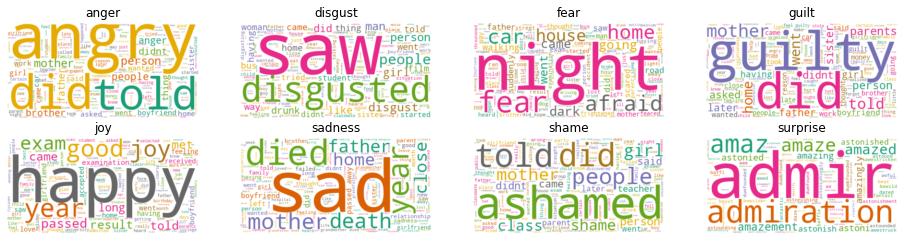

In [0]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame', 'surprise']

# Create subplots for each comedian
for index, feel in enumerate(data.columns):
    wc.generate(data_clean.transcript[feel])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [0]:
data_stop

,aa,abandoned,abdomen,abdominal,abhor,abhorr,abhorred,abhorrence,abhorrent,abilities,ability,able,abnormal,abomin,abominable,abominably,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abroad,abrupt,abruptely,abruptly,absailing,abscence,absence,absent,absentminded,absentmindedness,absolutely,absurd,abuse,abused,abusing,abusive,abut,academic,...,yielding,york,young,younger,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zigzagging,zip,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,0,0,1,1,0,1,0,2,4,8,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,2,3,1,1,1,0,...,1,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
disgust,1,1,0,0,0,1,1,0,2,0,3,4,0,1,1,1,0,0,1,2,1,1,1,0,0,0,0,0,2,0,0,0,1,0,1,2,3,0,0,1,...,0,0,21,5,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,3,...,0,1,13,4,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,...,0,0,15,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
joy,0,0,1,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,...,0,0,3,1,1,1,0,0,0,1,0,1,5,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
sadness,0,0,0,1,0,0,0,0,0,1,1,12,0,0,0,0,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,...,0,2,10,8,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,1,0,0,1,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,1,3,0,0,0,0,1,0,1,...,0,0,15,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [0]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['transcript'].apply(pol)
data_clean['subjectivity'] = data_clean['transcript'].apply(sub)
data_clean

,transcript,emotion,polarity,subjectivity
anger,when i had been obviously unjustly treated an...,anger,-0.095707,0.507272
disgust,at a gathering i found myself involuntarily s...,disgust,-0.139939,0.539478
fear,every time i imagine that someone i love or i...,fear,-0.073231,0.473787
guilt,i feel guilty when when i realize that i cons...,guilt,-0.089909,0.510017
joy,on days when i feel close to my partner and o...,joy,0.260348,0.503303
sadness,when i think about the short time that we liv...,sadness,-0.025014,0.487363
shame,when i realized that i was directing the feel...,shame,-0.009281,0.460054
surprise,admir admiration amaz amaze amazed amazement ...,surprise,0.411667,0.895000


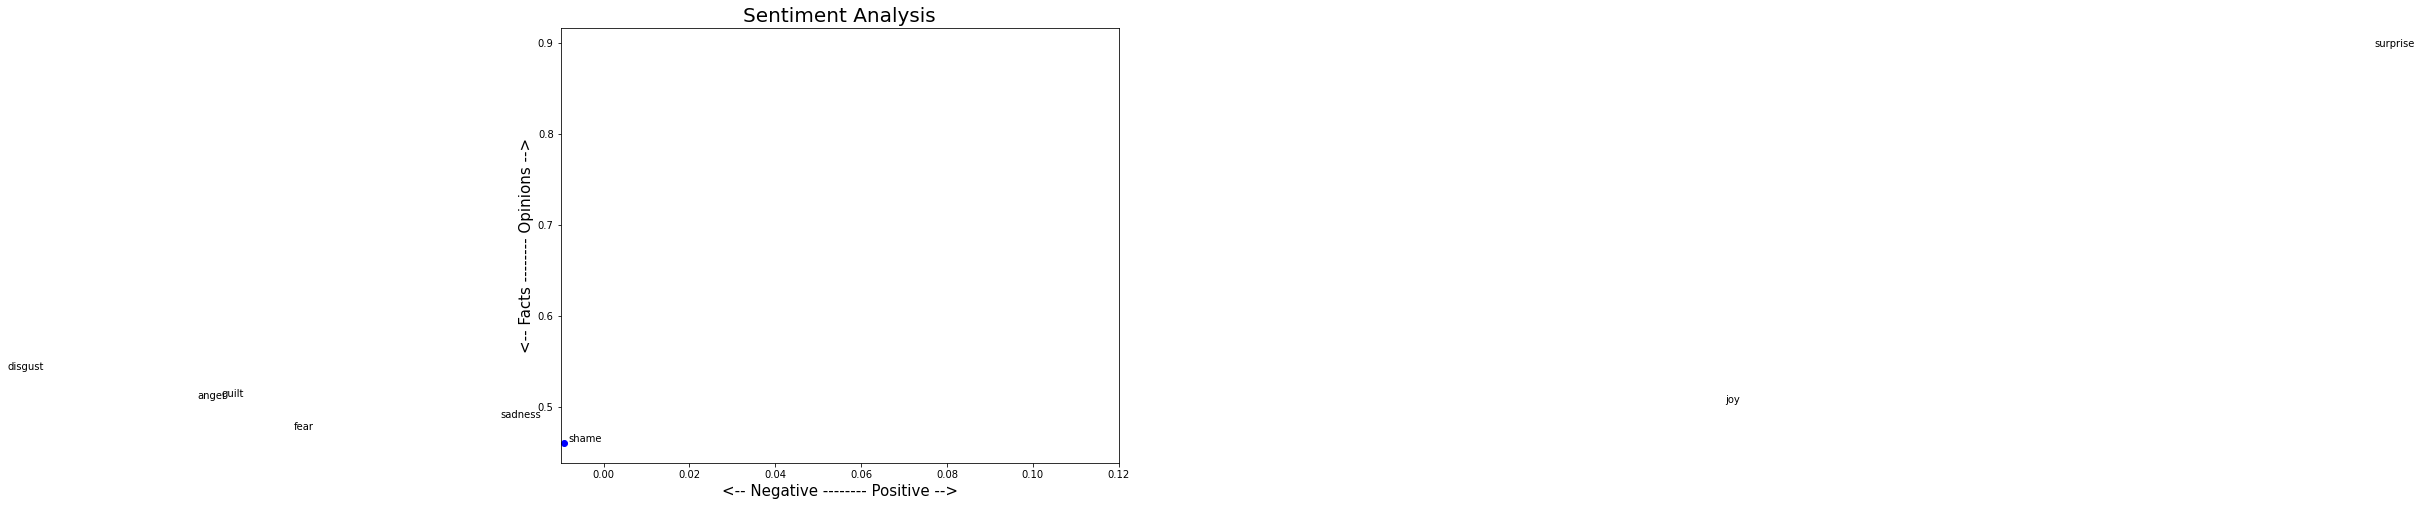

In [0]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
# emotion=['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame', 'surprise']

# data_clean['emotion']=emotion
for index, emotion in enumerate(data_clean.index):
    x = data_clean.polarity.loc[emotion]
    y = data_clean.subjectivity.loc[emotion]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_clean['emotion'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [0]:
# Let's take a look at our data again
data_clean

,transcript,emotion,polarity,subjectivity
anger,when i had been obviously unjustly treated an...,anger,-0.095707,0.507272
disgust,at a gathering i found myself involuntarily s...,disgust,-0.139939,0.539478
fear,every time i imagine that someone i love or i...,fear,-0.073231,0.473787
guilt,i feel guilty when when i realize that i cons...,guilt,-0.089909,0.510017
joy,on days when i feel close to my partner and o...,joy,0.260348,0.503303
sadness,when i think about the short time that we liv...,sadness,-0.025014,0.487363
shame,when i realized that i was directing the feel...,shame,-0.009281,0.460054
surprise,admir admiration amaz amaze amazed amazement ...,surprise,0.411667,0.895000


In [0]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_clean.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' when i had been obviously unjustly treated and had no possibility of elucidating this when a car is overtaking another and i am forced to drive off the road when one is unjustly accused of something one has not done friends who torture animals when my partner was attacked and lost three teeth unjust accusations directed at me and my way of acting by someone close to me   when i heard on the radio that the football match in belgium had ended in a catastrophe and several people had died  i could not  understand how normal people could behave in such a way at my summer job nobody looked after me in particular and i had to learn all on my own when i spoke to janerik wikstr÷m on the telephone  i locked myself out at work when an elderly man complained unjustifiably about me and distrusted me mad at my dad when someone stole my bike when friends try to put me down or hurt me   when my boyfriend went away for a month long holiday without me at a restaurant i observed how the gypsies tried

In [0]:
# The list has 10 elements, one for each transcript
len(list_pieces)

8

In [0]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [0]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.0814858294414945,
  -0.11349838592106631,
  -0.09561602772942979,
  -0.08220453901257473,
  -0.024648960833794947,
  -0.05674203848956328,
  -0.10635811353594854,
  -0.14230589727732582,
  -0.10823523369731904,
  -0.16555355138688477],
 [-0.07285680332739157,
  -0.11674860261067162,
  -0.12497486597486598,
  -0.1113436877276163,
  -0.08605727008952821,
  -0.1587309664264971,
  -0.1963154027042916,
  -0.1488444093444093,
  -0.18157017076803164,
  -0.20764714875233165],
 [-0.04136379253821111,
  -0.06895935933839162,
  -0.0738228052465721,
  -0.04049380358203886,
  -0.03797757133881533,
  -0.07677614319441242,
  -0.06350647323961929,
  -0.008573683754011612,
  -0.15511869987651233,
  -0.16973279187064236],
 [-0.10892750051200749,
  -0.08725095723858102,
  -0.07813620763620763,
  -0.03411239223739222,
  -0.031269456167415347,
  -0.08190691326994522,
  -0.11446084503165423,
  -0.0802661646802272,
  -0.1468585125811688,
  -0.1252632208662359],
 [0.23212390373012143,
  0.262863174325674

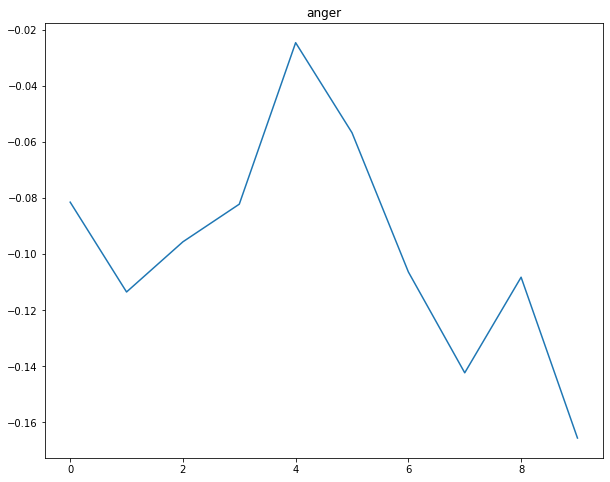

In [0]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data_clean['emotion'].index[0])
plt.show()

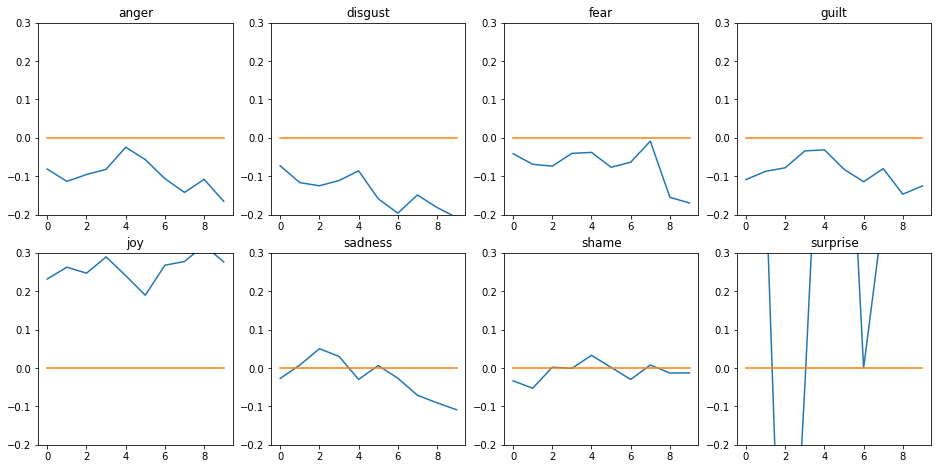

In [0]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data_clean.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data_clean['emotion'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [0]:
data_stop

,aa,abandoned,abdomen,abdominal,abhor,abhorr,abhorred,abhorrence,abhorrent,abilities,ability,able,abnormal,abomin,abominable,abominably,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abroad,abrupt,abruptely,abruptly,absailing,abscence,absence,absent,absentminded,absentmindedness,absolutely,absurd,abuse,abused,abusing,abusive,abut,academic,...,yielding,york,young,younger,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zigzagging,zip,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,0,0,1,1,0,1,0,2,4,8,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,2,3,1,1,1,0,...,1,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
disgust,1,1,0,0,0,1,1,0,2,0,3,4,0,1,1,1,0,0,1,2,1,1,1,0,0,0,0,0,2,0,0,0,1,0,1,2,3,0,0,1,...,0,0,21,5,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,3,...,0,1,13,4,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,...,0,0,15,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
joy,0,0,1,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,...,0,0,3,1,1,1,0,0,0,1,0,1,5,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
sadness,0,0,0,1,0,0,0,0,0,1,1,12,0,0,0,0,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,...,0,2,10,8,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,1,0,0,1,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,1,3,0,0,0,0,1,0,1,...,0,0,15,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
  # Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
# One of the required inputs is a term-document matrix
tdm = data_stop.transpose()
tdm.head()

,anger,disgust,fear,guilt,joy,sadness,shame,surprise
aa,0,1,0,0,0,0,1,0
abandoned,1,1,1,0,0,0,0,0
abdomen,0,0,0,0,1,0,0,0
abdominal,0,0,0,0,0,1,1,0
abhor,1,0,0,0,0,0,0,0


In [0]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [0]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
# cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [0]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.009*"did" + 0.006*"people" + 0.006*"told" + 0.006*"home" + 0.006*"mother" + 0.005*"saw" + 0.005*"went" + 0.005*"person" + 0.005*"night" + 0.005*"angry"'),
 (1,
  '0.009*"died" + 0.008*"sad" + 0.007*"passed" + 0.005*"years" + 0.005*"home" + 0.005*"good" + 0.005*"close" + 0.005*"father" + 0.005*"did" + 0.005*"boyfriend"')]

In [0]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.001*"did" + 0.000*"home" + 0.000*"told" + 0.000*"people" + 0.000*"saw" + 0.000*"father" + 0.000*"didnt" + 0.000*"came" + 0.000*"having" + 0.000*"mother"'),
 (1,
  '0.008*"saw" + 0.008*"night" + 0.007*"home" + 0.007*"disgusted" + 0.006*"people" + 0.006*"did" + 0.006*"car" + 0.006*"man" + 0.006*"afraid" + 0.005*"fear"'),
 (2,
  '0.009*"did" + 0.007*"told" + 0.007*"mother" + 0.005*"home" + 0.005*"went" + 0.005*"person" + 0.005*"angry" + 0.005*"father" + 0.005*"boyfriend" + 0.005*"died"')]

In [0]:
# LDA for num_topics = 8
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8, passes=10)
lda.print_topics()

[(0,
  '0.010*"passed" + 0.010*"happy" + 0.010*"joy" + 0.008*"good" + 0.008*"university" + 0.007*"year" + 0.006*"exam" + 0.006*"came" + 0.006*"long" + 0.005*"told"'),
 (1,
  '0.015*"night" + 0.011*"afraid" + 0.011*"car" + 0.011*"fear" + 0.010*"home" + 0.006*"did" + 0.006*"house" + 0.006*"going" + 0.006*"went" + 0.006*"dark"'),
 (2,
  '0.009*"did" + 0.007*"saw" + 0.007*"angry" + 0.007*"died" + 0.007*"people" + 0.006*"sad" + 0.006*"told" + 0.006*"person" + 0.006*"mother" + 0.006*"father"'),
 (3,
  '0.018*"guilty" + 0.014*"did" + 0.011*"mother" + 0.008*"told" + 0.007*"went" + 0.007*"home" + 0.006*"parents" + 0.006*"didnt" + 0.005*"person" + 0.005*"later"'),
 (4,
  '0.001*"beat" + 0.001*"stupid" + 0.001*"awful" + 0.001*"wonderful" + 0.001*"surprised" + 0.001*"surprise" + 0.001*"terrific" + 0.001*"tremendous" + 0.001*"wonder" + 0.001*"aw"'),
 (5,
  '0.000*"did" + 0.000*"died" + 0.000*"people" + 0.000*"told" + 0.000*"saw" + 0.000*"mother" + 0.000*"girl" + 0.000*"went" + 0.000*"boyfriend" + 0

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [0]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
anger,i possibility car i road one something friends...
disgust,gathering i people opinions i i bristle liver ...
fear,time someone i i illness death time i meaning ...
guilt,i i things relatives i i weekend i i something...
joy,days i partner friends i peace contact people ...
sadness,i time periods life i i time i work something ...
shame,i i feelings discontent partner way blame feel...
surprise,admiration amaz amaze astound aw awe baffl baf...


In [0]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abdomen,abhor,abhorrence,abilities,ability,abomin,abomination,abortion,aboveboard,abrupt,abscence,absence,absentmindedness,abuse,abut,academics,academy,accent,accentance,acceptance,accident,accidentaly,accidents,accomodation,accomplishment,account,accounting,accounts,accquaintances,accusations,accusers,achievement,achievment,acquaintace,acquaintance,acquaintances,acquaintences,act,action,actions,...,ye,year,years,yeaterday,yell,yes,yesterday,yield,york,younger,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,1,2,4,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,5,0,0,1,0,3,0,2,0,3,0,0,0,0,5,1,0,2,3,2,...,0,17,20,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
disgust,0,0,0,0,3,1,0,1,1,0,0,2,0,1,0,0,0,0,0,0,7,1,0,2,0,1,0,0,0,1,1,0,0,0,9,0,0,3,2,4,...,0,16,15,0,0,0,3,0,0,0,2,0,0,2,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39,0,1,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,...,0,26,24,1,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,11,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,3,2,3,...,0,16,20,0,0,0,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
joy,1,0,0,1,0,0,0,1,0,0,0,3,0,0,0,1,1,0,1,9,2,0,0,0,1,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,...,0,68,39,0,0,2,5,0,0,1,0,0,0,1,0,1,4,0,1,0,1,0,0,4,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0
sadness,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,34,0,0,1,0,0,1,0,0,0,0,0,0,0,3,1,1,0,0,1,...,2,34,75,0,0,0,0,0,2,2,0,0,1,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,7,0,0,1,0,0,0,0,2,0,0,0,0,0,7,1,0,3,1,0,...,0,12,29,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [0]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"night" + 0.013*"friend" + 0.011*"home" + 0.011*"car" + 0.011*"man" + 0.009*"friends" + 0.009*"fear" + 0.008*"day" + 0.008*"house" + 0.008*"school"'),
 (1,
  '0.030*"friend" + 0.014*"friends" + 0.013*"mother" + 0.012*"day" + 0.011*"school" + 0.010*"home" + 0.010*"person" + 0.010*"father" + 0.009*"boyfriend" + 0.009*"parents"')]

In [0]:
# Let's try 8 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=8, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.022*"friend" + 0.014*"friends" + 0.012*"school" + 0.010*"man" + 0.010*"joy" + 0.010*"day" + 0.009*"person" + 0.009*"university" + 0.009*"year" + 0.009*"girl"'),
 (1,
  '0.030*"friend" + 0.015*"mother" + 0.014*"friends" + 0.014*"home" + 0.013*"day" + 0.012*"night" + 0.011*"father" + 0.011*"car" + 0.011*"school" + 0.011*"person"'),
 (2,
  '0.002*"friend" + 0.001*"friends" + 0.001*"home" + 0.001*"school" + 0.001*"person" + 0.001*"mother" + 0.001*"day" + 0.001*"boyfriend" + 0.001*"father" + 0.001*"parents"'),
 (3,
  '0.001*"friend" + 0.001*"school" + 0.001*"friends" + 0.001*"home" + 0.000*"day" + 0.000*"year" + 0.000*"university" + 0.000*"person" + 0.000*"girl" + 0.000*"years"'),
 (4,
  '0.001*"friend" + 0.001*"night" + 0.001*"home" + 0.001*"school" + 0.001*"friends" + 0.001*"man" + 0.001*"person" + 0.000*"day" + 0.000*"mother" + 0.000*"girl"'),
 (5,
  '0.001*"night" + 0.001*"car" + 0.001*"school" + 0.001*"day" + 0.001*"friend" + 0.001*"home" + 0.001*"friends" + 0.001*"mother" + 

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [0]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [0]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
anger,i possibility car i road one something friends...
disgust,gathering i next people opinions i low i brist...
fear,time i someone i i serious illness death first...
guilt,i guilty i i material things important relativ...
joy,days i partner other friends i peace close con...
sadness,i short time periods life i i short time i har...
shame,i i feelings discontent partner way blame own ...
surprise,admir admiration amaz amaze amazement amazing ...


In [0]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,abandoned,abdomen,abdominal,abhor,abhorr,abhorrence,abhorrent,abilities,ability,abnormal,abomin,abominable,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abrupt,abscence,absence,absent,absentmindedness,absurd,abuse,abusive,abut,academic,academics,academy,acccouting,accent,accentance,accept,acceptable,acceptance,accepted,accidentaly,accidents,accomodation,...,yellow,yes,yesterday,yesterdays,yield,york,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zipper,zomba,zombies,zone,zoophiliac
anger,1,0,0,1,1,1,0,2,4,0,1,0,1,1,0,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
disgust,0,0,0,0,1,0,2,0,3,0,1,1,0,0,1,1,1,1,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,...,0,0,3,1,0,0,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
joy,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,1,1,0,0,1,1,0,9,1,0,0,0,...,0,2,5,0,0,0,1,1,0,0,0,1,0,1,4,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0
sadness,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,3,1,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
word2idna = dict((k, v) for k, v in cvna.vocabulary_.items())

In [0]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"afraid" + 0.008*"fear" + 0.005*"drunk" + 0.005*"disgust" + 0.005*"dark" + 0.004*"anger" + 0.003*"roommate" + 0.003*"girls" + 0.003*"big" + 0.002*"dead"'),
 (1,
  '0.014*"guilty" + 0.007*"happy" + 0.006*"joy" + 0.005*"grandmother" + 0.005*"shame" + 0.004*"wrong" + 0.004*"guilt" + 0.004*"ashamed" + 0.003*"birthday" + 0.003*"grandfather"')]

In [0]:
# Let's try 8 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=8, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.000*"guilty" + 0.000*"happy" + 0.000*"joy" + 0.000*"grandmother" + 0.000*"afraid" + 0.000*"disgust" + 0.000*"drunk" + 0.000*"wrong" + 0.000*"guilt" + 0.000*"fear"'),
 (1,
  '0.000*"happy" + 0.000*"guilty" + 0.000*"joy" + 0.000*"afraid" + 0.000*"wrong" + 0.000*"shame" + 0.000*"drunk" + 0.000*"fear" + 0.000*"ashamed" + 0.000*"girls"'),
 (2,
  '0.027*"guilty" + 0.018*"afraid" + 0.015*"fear" + 0.009*"dark" + 0.006*"guilt" + 0.003*"ill" + 0.003*"wrong" + 0.003*"big" + 0.003*"water" + 0.003*"drunk"'),
 (3,
  '0.001*"wonderful" + 0.001*"surprise" + 0.001*"tremendous" + 0.001*"admiration" + 0.001*"admir" + 0.001*"awful" + 0.001*"fantastic" + 0.001*"baffl" + 0.001*"mystify" + 0.001*"aw"'),
 (4,
  '0.010*"disgust" + 0.009*"grandmother" + 0.007*"drunk" + 0.006*"grandfather" + 0.006*"sadness" + 0.004*"cancer" + 0.004*"relative" + 0.004*"dead" + 0.003*"food" + 0.003*"ill"'),
 (5,
  '0.016*"shame" + 0.015*"ashamed" + 0.010*"wrong" + 0.006*"public" + 0.005*"sexual" + 0.005*"drunk" + 0.004*"

## Identify Topics in Each Document

In [0]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=8, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.000*"afraid" + 0.000*"guilty" + 0.000*"happy" + 0.000*"joy" + 0.000*"fear" + 0.000*"shame" + 0.000*"wrong" + 0.000*"public" + 0.000*"drunk" + 0.000*"guilt"'),
 (1,
  '0.000*"happy" + 0.000*"joy" + 0.000*"guilty" + 0.000*"afraid" + 0.000*"fear" + 0.000*"birthday" + 0.000*"period" + 0.000*"glad" + 0.000*"final" + 0.000*"college"'),
 (2,
  '0.010*"grandmother" + 0.010*"shame" + 0.009*"ashamed" + 0.007*"wrong" + 0.006*"grandfather" + 0.006*"sadness" + 0.005*"cancer" + 0.004*"public" + 0.004*"funeral" + 0.003*"china"'),
 (3,
  '0.012*"anger" + 0.006*"argument" + 0.005*"roommate" + 0.004*"wrong" + 0.004*"girls" + 0.003*"fight" + 0.003*"opinion" + 0.003*"team" + 0.003*"leader" + 0.003*"colleague"'),
 (4,
  '0.026*"afraid" + 0.024*"fear" + 0.015*"dark" + 0.004*"big" + 0.004*"horror" + 0.004*"middle" + 0.004*"forest" + 0.004*"scared" + 0.004*"frightened" + 0.004*"dead"'),
 (5,
  '0.001*"flummox" + 0.001*"baffle" + 0.001*"marvelous" + 0.001*"marvel" + 0.001*"wonder" + 0.001*"flabbergas

In [0]:
from gensim.models import CoherenceModel# Compute Coherence Score

print('\nPerplexity: ', lda.log_perplexity(corpus))


Perplexity:  -8.009409458146576


In [0]:
from gensim import corpora

d = corpora.Dictionary()
d.id2token = id2wordna
d.token2id = word2idna

In [0]:
type(d)

gensim.corpora.dictionary.Dictionary

In [0]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# model = LdaModel(common_corpus, 5, common_dictionary)
cm = CoherenceModel(model=ldana, texts=data_nouns_adj.transcript, dictionary=d, coherence='c_uci')
coherence = cm.get_coherence()  # get coherence value
print('\nCoherence Score: ', coherence)


Coherence Score:  nan


/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)


In [0]:
types=list(data_dtmna.index)

In [0]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
li=[]
i=0
for j in corpus_transformed:
  li.append((j[0][0],types[i]))
  i+=1
li

[(3, 'anger'),
 (7, 'disgust'),
 (4, 'fear'),
 (6, 'guilt'),
 (6, 'joy'),
 (2, 'sadness'),
 (2, 'shame'),
 (5, 'surprise')]

In [0]:
from sklearn.metrics import classification_report
